In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.concept_utils import conceptExample, gate_score
import numpy as np

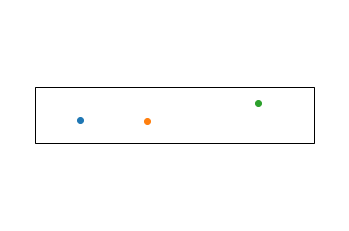

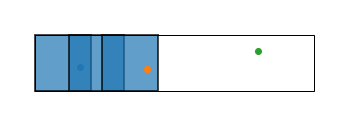

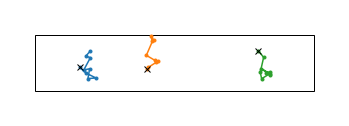

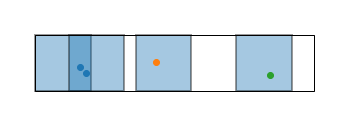

In [3]:
ce = conceptExample()

ce.plot_starting()
ce.plot_cams()
ce.plot_paths()
ce.plot_detections()


In [4]:
ce.df

,time,individual,x,y
0,0,0,0.800000,0.420337
1,1,0,0.911330,0.319702
2,3,1,2.162800,0.518905
3,6,2,4.214346,0.279655


In [5]:
def step_tracks(t, tracks, ce):
    det = ce.df[ce.df["time" ]==t]
    return ce.update_tracks(det, tracks)

In [62]:
def step_tracks_scores(t, tracks, ce, scores):
    det = ce.df[ce.df["time" ]==t]
#     gate_score(t, ce.df, ce.var, ce.thresh, np.multiply(*ce.cam_area), 3/5)
    return ce.update_score_tracks(det, tracks, scores)

In [50]:
ce.df

,time,individual,x,y
0,0,0,0.800000,0.420337
1,1,0,0.911330,0.319702
2,3,1,2.162800,0.518905
3,6,2,4.214346,0.279655


In [63]:
tracks = ce.make_first_track()
scores = [0,0]

In [64]:
tracks

[[0], [nan]]

In [ ]:
tracks1, scores1 = step_tracks_scores(1, tracks, ce, scores)

In [69]:
print(tracks1, scores1)

[[0, nan], [0, 1], [nan, nan], [nan, 1]] [0.6, 0.4409794697105468, 0.6, 0]


In [73]:
tracks1, scores1 = step_tracks_scores(1, tracks, ce, scores)
tracks2, scores2 = step_tracks_scores(2, tracks1, ce, scores1)
tracks3, scores3 = step_tracks_scores(3, tracks2, ce, scores2)
tracks4, scores4 = step_tracks_scores(4, tracks3, ce, scores3)
tracks5, scores5 = step_tracks_scores(5, tracks4, ce, scores4)
tracks6, scores6 = step_tracks_scores(6, tracks5, ce, scores5)

Gated detection 3 from 0
Gated detection 3 from 2
Gated detection 3 from 1
Gated detection 3 from 2
Gated detection 3 from 2
Gated detection 3 from 1
Gated detection 3 from 2


In [74]:
for i, t in enumerate(tracks6):
    print(t, scores6[i])

[0, nan, nan, nan, nan, nan, nan] 1.2
[0, nan, nan, 2, nan, nan, nan] -0.008097226016564318
[0, 1, nan, nan, nan, nan, nan] 1.4409794697105467
[0, 1, nan, 2, nan, nan, nan] 0.7291803104402681
[nan, nan, nan, nan, nan, nan, nan] 1.2
[nan, nan, nan, nan, nan, nan, 3] 1.0
[nan, nan, nan, 2, nan, nan, nan] 1.0
[nan, 1, nan, nan, nan, nan, nan] 1.0
[nan, 1, nan, 2, nan, nan, nan] 0.2882008407297212


In [38]:
tracks3

[[0, nan, nan, nan], [0, nan, nan, 2]]

In [9]:
tracks1 = step_tracks(1, tracks, ce)
tracks2 = step_tracks(2, tracks1, ce)
tracks3 = step_tracks(3, tracks2, ce)
tracks4 = step_tracks(4, tracks3, ce)

In [10]:
tracks1

[[0, nan], [0, 1], [nan, nan], [nan, 1]]

In [24]:
for t in tracks1:
    print(t)
    print(gate_score(t, ce.df, ce.var, ce.thresh, np.multiply(*ce.cam_area), 3/5))

[0, nan]
('keep', 0.6)
[0, 1]
('keep', 0.4412897948248704)
[nan, nan]
('keep', 0)
[nan, 1]
('keep', 0)


In [12]:
for t in tracks2:
    print(t)
    print(gate_score(t, ce.df, ce.var, ce.thresh, np.multiply(*ce.cam_area), 3/5))

[0, nan, nan]
('keep', 0.6)
[0, 1, nan]
('keep', 0.6)
[nan, nan, nan]
('keep', 0)
[nan, 1, nan]
('keep', 0.6)


In [13]:
for t in tracks3:
    print(t)
    print(gate_score(t, ce.df, ce.var, ce.thresh, np.multiply(*ce.cam_area), 3/5))

[0, nan, nan, nan]
('keep', 0.6)
[0, nan, nan, 2]
('keep', -1.0080972260165644)
[0, 1, nan, nan]
('keep', 0.6)
[0, 1, nan, 2]
('keep', -0.5117991592702789)
[nan, nan, nan, nan]
('keep', 0)
[nan, nan, nan, 2]
('keep', 0)
[nan, 1, nan, nan]
('keep', 0.6)
[nan, 1, nan, 2]
('keep', -0.5117991592702789)


In [14]:
ce.df

,time,individual,x,y
0,0,0,0.800000,0.420337
1,1,0,0.911330,0.319702
2,3,1,2.162800,0.518905
3,6,2,4.214346,0.279655


In [25]:
tracks7 = step_tracks(5, tracks4, ce)

In [31]:
for i, t in enumerate(tracks4):
    print(t, tracks7[i])

[0, nan, nan, nan, nan] [0, nan, nan, nan, nan, nan]
[0, nan, nan, 3, nan] [0, nan, nan, 3, nan, nan]
[0, nan, nan, 3, 4] [0, nan, nan, 3, 4, nan]
[0, nan, 2, nan, nan] [0, nan, 2, nan, nan, nan]
[0, nan, 2, nan, 4] [0, nan, 2, nan, 4, nan]
[0, nan, 2, 3, nan] [0, nan, 2, 3, nan, nan]
[0, nan, 2, 3, 4] [0, nan, 2, 3, 4, nan]
[0, 1, nan, nan, nan] [0, 1, nan, nan, nan, nan]
[0, 1, nan, nan, 4] [0, 1, nan, nan, 4, nan]
[0, 1, nan, 3, nan] [0, 1, nan, 3, nan, nan]
[0, 1, nan, 3, 4] [0, 1, nan, 3, 4, nan]
[0, 1, 2, nan, nan] [0, 1, 2, nan, nan, nan]
[0, 1, 2, nan, 4] [0, 1, 2, nan, 4, nan]
[0, 1, 2, 3, nan] [0, 1, 2, 3, nan, nan]
[0, 1, 2, 3, 4] [0, 1, 2, 3, 4, nan]
[nan, nan, nan, nan, nan] [nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, 4] [nan, nan, nan, nan, 4, nan]
[nan, nan, nan, 3, nan] [nan, nan, nan, 3, nan, nan]
[nan, nan, nan, 3, 4] [nan, nan, nan, 3, 4, nan]
[nan, nan, 2, nan, nan] [nan, nan, 2, nan, nan, nan]
[nan, nan, 2, nan, 4] [nan, nan, 2, nan, 4, nan]
[nan, nan, 2, 3

In [10]:
tracks

[[0, nan, nan],
 [0, nan, 2],
 [0, 1, nan],
 [0, 1, 2],
 [nan, nan, nan],
 [nan, nan, 2],
 [nan, 1, nan],
 [nan, 1, 2]]

In [11]:
ta = np.array(tracks)

In [12]:
np.unique(ta[:, 2])

array([ 2., nan, nan, nan, nan])